<a href="https://colab.research.google.com/github/9-coding/PyTorch/blob/main/Lecture-AI_programming/pandas_EDA_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Dataset
sklearn을 통한 data load
Iris Dataset은 1936년 영국의 통계학자인 Ronald A. Fisher가 처음 소개한 Dataset임.
이 Dataset은 세 가지 종류의 붓꽃(Iris Setosa, Iris Versicolour, Iris Virginica)의 sample data로 구성됨.
각 sample은 다음의 네 가지 특성(feature)을 가짐:

- 꽃받침 길이(Sepal Length)
- 꽃받침 너비(Sepal Width)
- 꽃잎 길이(Petal Length)
- 꽃잎 너비(Petal Width)
총 150개의 sample이 있으며, 각 sample은 위의 네 가지 특성과 함께 해당하는 꽃의 종류로 라벨링(labeling)되어 있음.

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix as sm

# Dataset

In [35]:
iris = load_iris()
print(type(iris))
dir(iris)

<class 'sklearn.utils._bunch.Bunch'>


['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

# Exploratory Data Analysis (EDA)

탐색적 데이터 분석.
### `IPython.display`
- 다양한 객체를 출력할 수 있도록 해줌
- 이미지, 오디오, 비디오, html, LaTex 등

In [36]:
from IPython import display
display.Markdown(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
    :Class Distribution: 33.3% for each of 3 classes.
    :Creator: R.A. Fisher
    :Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
    :Date: July, 1988

The famous Iris database, first used by Sir R.A. Fisher. The dataset is taken
from Fisher's paper. Note that it's the same as in R, but not as in the UCI
Machine Learning Repository, which has two wrong data points.

This is perhaps the best known database to be found in the
pattern recognition literature.  Fisher's paper is a classic in the field and
is referenced frequently to this day.  (See Duda & Hart, for example.)  The
data set contains 3 classes of 50 instances each, where each class refers to a
type of iris plant.  One class is linearly separable from the other 2; the
latter are NOT linearly separable from each other.

.. topic:: References

   - Fisher, R.A. "The use of multiple measurements in taxonomic problems"
     Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions to
     Mathematical Statistics" (John Wiley, NY, 1950).
   - Duda, R.O., & Hart, P.E. (1973) Pattern Classification and Scene Analysis.
     (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
   - Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
     Structure and Classification Rule for Recognition in Partially Exposed
     Environments".  IEEE Transactions on Pattern Analysis and Machine
     Intelligence, Vol. PAMI-2, No. 1, 67-71.
   - Gates, G.W. (1972) "The Reduced Nearest Neighbor Rule".  IEEE Transactions
     on Information Theory, May 1972, 431-433.
   - See also: 1988 MLC Proceedings, 54-64.  Cheeseman et al"s AUTOCLASS II
     conceptual clustering system finds 3 classes in the data.
   - Many, many more ...

# Pandas
### `DataFrame`
- 행과 열로 이루어진 2차원 데이터를 다루기 위한 객체.

열 선택:
`df['col1']`

In [37]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target

## 데이터 조회
 `df.info()`
- 데이터프레임 정보 출력.
- 크기, 데이터 타입, 결측치 등 정보 확인

`df.head()`
- 데이터프레임의 첫 n행 출력.
- 기본값은 5.

`df.describe()`
- 요약 통계량 출력.
- 각 열의 개수, 평균, 표준편차, 최소값, 25% 백분위, 중앙값, 75% 백분위, 최대값 등 정보 확인
- 일반적으로 분산이 큰 데이터가 중요한 데이터일 가능성이 높음.
- std, min, max 등을 중요하게 볼 것.

In [38]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [40]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [41]:
# 선택한 열의 개수 출력
df['label'].value_counts()

label
0    50
1    50
2    50
Name: count, dtype: int64

In [42]:
# 배열에서 중복 제거
np.unique(iris.target_names) # 0: benign, 1: malignant

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

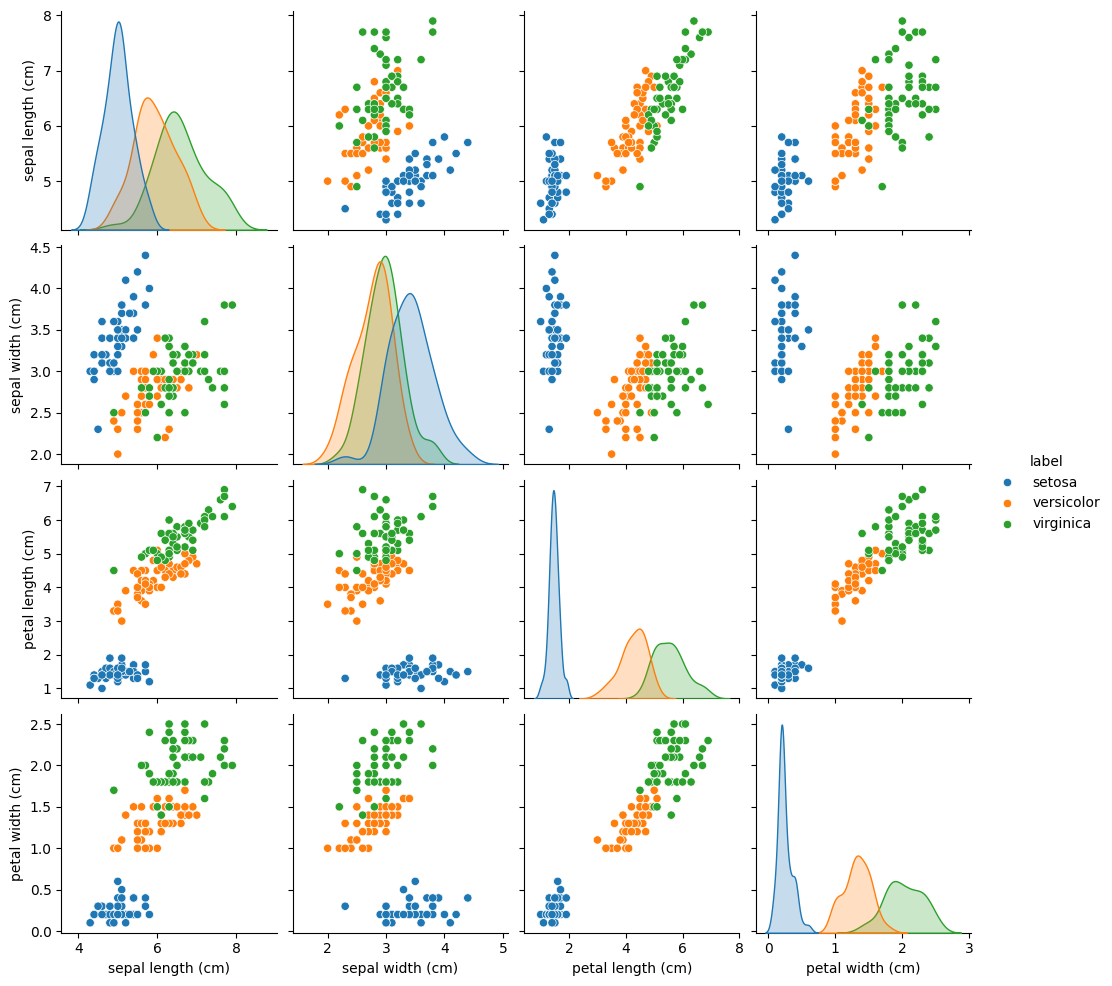

In [43]:
# 종(species) 열을 문자열로 변환
ori_species = df['label'].copy()

df['label'] = df['label'].apply(lambda x: iris.target_names[x])

# 페어플롯(pairplot) 시각화
# 기본 사이즈 설정
sns.pairplot(df, hue='label')
plt.show()
df['label']= ori_species # 원상복구


# Data Processing

In [44]:
x_raw = iris.data
y_raw = iris.target

print(f'{type(x_raw)=}:{x_raw.shape=}')
print(f'{type(y_raw)=}:{y_raw.shape=}')

type(x_raw)=<class 'numpy.ndarray'>:x_raw.shape=(150, 4)
type(y_raw)=<class 'numpy.ndarray'>:y_raw.shape=(150,)


In [45]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

<hr>

read_csv를 이용한 data load

In [46]:
data_url = 'https://blog.kakaocdn.net/dn/bBaIM3/btsGBsBNUDl/irTKKK1MF1Y1o6JHpGn3n1/boston.csv?attach=1&knm=tfile.csv'

# read_csv
df = pd.read_csv(
    data_url,      # url or file path
    skiprows = 0, # num of rows to skip
    header = 0, # header row
    sep = ','    # separator
)
df

,CRIM,ZN,INDUS,CHAS,NOX,RN,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [47]:

# tmp = df[['RN','MEDV']].values
#tmp = df[['RN','AGE','LSTAT','MEDV']].values
#tmp = df[features].values
tmp = df.values
x_raw = tmp[:,:-1]
y_raw = tmp[:,-1:]

print(x_raw.shape)
print(y_raw.shape)


y_raw.reshape(-1,1)
print(y_raw.shape)

(506, 13)
(506, 1)
(506, 1)


In [48]:
features = [
    'CRIM',
    'ZN',
    'INDUS',
    'CHAS',
    'NOX',
    'RN',
    'AGE',
    'DIS',
    'RAD',
    'TAX',
    'PIRATIO',
    'B',
    'LSTAT',
    'MEDV'
]
df = pd.DataFrame(np.hstack([x_raw,y_raw.reshape(-1,1)]), columns=features)

df.to_csv('boston.csv',index=False)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RN       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PIRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


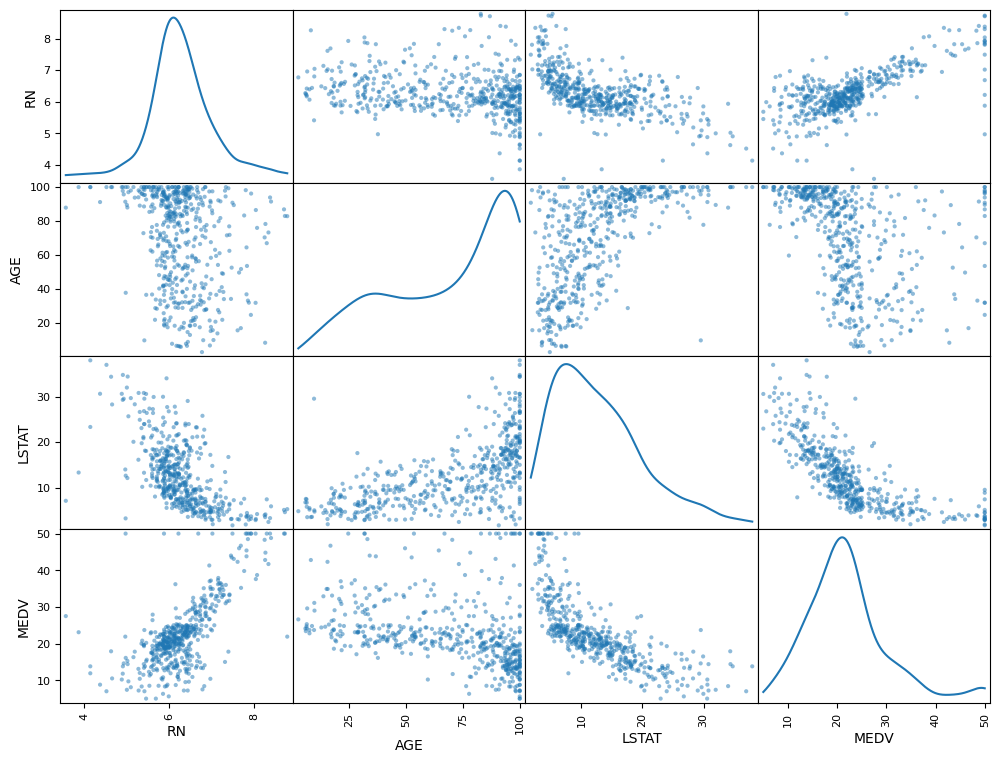

In [49]:
sm(df[['RN','AGE','LSTAT','MEDV']], diagonal='kde', figsize=(12,9))
plt.show()